Loading IMDb Dataset for Sentiment Analysis


In [7]:
import tensorflow as tf
from keras.datasets import imdb

vocabulary_size=5000 ## Maximum number of unique words to be loaded
(train_review,train_label),(test_review,test_label)=imdb.load_data(num_words=vocabulary_size)
# Words that are more frequent in the dataset are retained, while less frequent words are discarded

Shapes of Training and Testing IMDb  Datasets:

In [8]:
print("Shape of Training review dataset:",train_review.shape)
print("Shape of Training review label:",train_label.shape)
print("Shape of Testing review dataset:",test_review.shape)
print("Shape of Testing review label:",test_label.shape)



print("------------Review-----------------")
print(train_review[0])
print("--------------Label---------------")
print(train_label[0])#(0 for negative, 1 for positive).

Shape of Training review dataset: (25000,)
Shape of Training review label: (25000,)
Shape of Testing review dataset: (25000,)
Shape of Testing review label: (25000,)
------------Review-----------------
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 1

Displaying IMDB Review in Words

In [9]:
word_to_id=imdb.get_word_index()# Get the word-to-index dictionary from IMDb dataset
id_to_word={i:word for word,i in word_to_id.items()}# Create a dictionary to map index to word for IMDb dataset

print("Original Review[First Review]")
for i in train_review[0]:
    print(id_to_word[i],end=" ")
print()
print([id_to_word.get(i," ")for i in train_review[0]])


Original Review[First Review]
the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s and with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over and for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought and but of script you not while history he heart to real at and but when from one


Determining Max and Min Length of IMDb Reviews

In [10]:
print("Max Lenght of Review:",end=" ")
print(len(max(train_review+test_review,key=len)))
print("Min Lenght of Review:",end=" ")
print(len(min(train_review+test_review,key=len)))

Max Lenght of Review: 2697
Min Lenght of Review: 70


Padding IMDb Reviews to a Maximum Length

In [11]:
from keras.utils import pad_sequences

max_len=500
train_review=pad_sequences(train_review,maxlen=max_len)
test_review=pad_sequences(test_review,maxlen=max_len)


Building and Training an LSTM Model for Sentiment Analysis

In [12]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,SimpleRNN

embedding_size=32

model=Sequential()
model.add(Embedding(vocabulary_size,embedding_size,input_length=max_len))
model.add(SimpleRNN(100))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
history=model.fit(train_review,train_label,validation_split=0.1,batch_size=25,epochs=3)
loss,accuracy=model.evaluate(test_review,test_label)

print("loss:",{loss})
print("accuracy:",{accuracy})

Epoch 1/3
900/900 [==============================] - 51s 55ms/step - loss: 0.6686 - accuracy: 0.5669 - val_loss: 0.5622 - val_accuracy: 0.7056
Epoch 2/3
900/900 [==============================] - 52s 57ms/step - loss: 0.5451 - accuracy: 0.7194 - val_loss: 0.5381 - val_accuracy: 0.7480
Epoch 3/3
782/782 [==============================] - 14s 17ms/step - loss: 0.4961 - accuracy: 0.7780
loss: {0.49611496925354004}
accuracy: {0.777999997138977}


<function matplotlib.pyplot.show(close=None, block=None)>

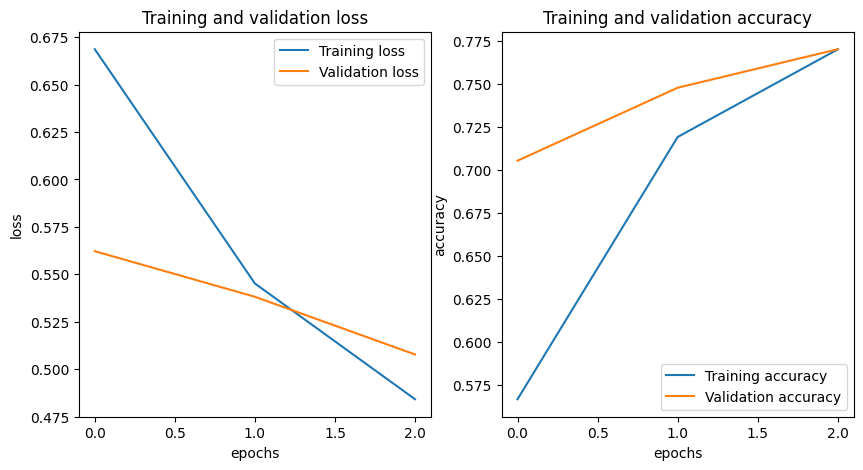

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],label="Training accuracy")
plt.plot(history.history["val_accuracy"],label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show


Making Predictions on Test Dataset

In [15]:
import numpy as np 

prediction=model.predict(test_review)

##Each prediction is a probability score indicating the likelihood of the review being classified as either positive or negative sentiment.
print("Printing the entire predictions array")
print(prediction)
print("Accessing and printing the first prediction array")
print(prediction[0])
print("Accessing and printing the first element of the first prediction array")
print(prediction[0][0])



782/782 [==============================] - 16s 20ms/step
Printing the entire predictions array
[[0.08977042]
 [0.9435839 ]
 [0.16307293]
 ...
 [0.62650144]
 [0.23712213]
 [0.90602756]]
Accessing and printing the first prediction array
[0.08977042]
Accessing and printing the first element of the first prediction array
0.08977042



Predicted vs. Actual Sentiment Comparison

In [16]:
##Each prediction is a probability score indicating the likelihood of the review being classified as either positive or negative sentiment.
# Less than 0.5 --> Negative  otherwise -->Positive
sentiment=['Negative','Positive']
for i in range(len(prediction)):
    a=prediction[i]
    if a[0]<0.5:
        print("Predicted :Negative         Actual :",sentiment[test_label[i]])
    else:
        print("Predicted :Positive         Actual :",sentiment[test_label[i]])

Predicted :Negative         Actual : Negative
Predicted :Positive         Actual : Positive
Predicted :Negative         Actual : Positive
Predicted :Negative         Actual : Negative
Predicted :Positive         Actual : Positive
Predicted :Negative         Actual : Positive
Predicted :Negative         Actual : Positive
Predicted :Negative         Actual : Negative
Predicted :Negative         Actual : Negative
Predicted :Positive         Actual : Positive
Predicted :Positive         Actual : Positive
Predicted :Negative         Actual : Negative
Predicted :Negative         Actual : Negative
Predicted :Negative         Actual : Negative
Predicted :Positive         Actual : Positive
Predicted :Negative         Actual : Negative
Predicted :Positive         Actual : Positive
Predicted :Negative         Actual : Negative
Predicted :Negative         Actual : Negative
Predicted :Negative         Actual : Negative
Predicted :Positive         Actual : Positive
Predicted :Positive         Actual

In [17]:
!pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Prediction for a Single Review

In [20]:
review="Despite a slow start, the film gradually builds tension, keeping the audience on the edge of their seats until the thrilling climax."

import re
import nltk
import numpy as np
nltk.download('stopwords')
from  nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer()
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from nltk.corpus import stopwords
stopword_list=stopwords.words('english')

def preprocess_input(sentence):
    pattern=r'[^a-zA-Z0-9]'
    sentence=re.sub(pattern,' ',sentence)
    print(sentence)
    tokens=tokenizer.tokenize(sentence)
    print(tokens)
    tokens=[stemmer.stem(word) for word in tokens] 
    print(tokens)
    filtered_tokens=[word for word in tokens if word not in stopword_list]
    print(filtered_tokens)
    final_review=[word_to_id[word] for word in filtered_tokens if word in word_to_id.keys() and word_to_id[word]<vocabulary_size  ]
    print(final_review)
    final_review=np.array(final_review)
    print(final_review)
    return final_review




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ALPHONSA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
reviews=[preprocess_input(review)]
reviews=pad_sequences(reviews,maxlen=max_len)
prediction=model.predict(reviews)

a=prediction[0]
if a[0]<0.5:
    print("Predicted :Negative")
else:
    print("Predicted :Positive")        

Despite a slow start  the film gradually builds tension  keeping the audience on the edge of their seats until the thrilling climax 
['Despite', 'a', 'slow', 'start', 'the', 'film', 'gradually', 'builds', 'tension', 'keeping', 'the', 'audience', 'on', 'the', 'edge', 'of', 'their', 'seats', 'until', 'the', 'thrilling', 'climax']
['despit', 'a', 'slow', 'start', 'the', 'film', 'gradual', 'build', 'tension', 'keep', 'the', 'audienc', 'on', 'the', 'edg', 'of', 'their', 'seat', 'until', 'the', 'thrill', 'climax']
['despit', 'slow', 'start', 'film', 'gradual', 'build', 'tension', 'keep', 'audienc', 'edg', 'seat', 'thrill', 'climax']
[547, 377, 19, 1700, 1071, 398, 2221, 3971, 1327]
[ 547  377   19 1700 1071  398 2221 3971 1327]
1/1 [==============================] - 0s 24ms/step
Predicted :Positive
